In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp
from statsmodels.stats.power import tt_ind_solve_power

# T Test

A t test is inferntial statistics which is used to determine if there is a significant difference between the menas of two groups which may be related in certain features

T-test has 2 types: 1)One sampled test 2)Two sampled test

t=(sample mean - population mean) / standard error

In [2]:
ages=[20,40,35,48,38,56,32,19,25,58,18,26,45,43,27,21,49,42,28,33,24,39,57,26,42,77,55,38,60,73]

In [3]:
ages_mean=np.mean(ages)
print(ages_mean)

39.8


In [4]:
#Lets take sample
sample_size=10
age_sample=np.random.choice(ages,sample_size)
age_sample

array([19, 55, 57, 56, 27, 20, 33, 35, 56, 32])

In [5]:
from scipy.stats import ttest_1samp

In [7]:
ttest,p_value=ttest_1samp(age_sample,33)

In [8]:
print(p_value)

0.2521663621596163


In [9]:
if p_value < 0.05:
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

We are accepting null hypothesis


In [10]:
df=pd.read_excel("E:/New folder/Result.xlsx")
df

,Roll No,Name,Sub1,Sub2,Sub3,Total,Result
0,101,Akash,45,45,45,135,P
1,102,Manoj,35,45,42,122,P
2,103,Mrunal,29,26,30,85,P
3,104,Saurabh,38,35,29,102,P
4,105,Ashish,41,40,34,115,P
5,106,Sudhir,46,62,41,149,P
6,107,Ria,29,48,27,104,P
7,108,Prathana,43,33,33,109,P
8,109,Mihika,37,30,38,105,P
9,110,Shaurya,33,31,41,105,P


In [11]:
df.describe()

,Roll No,Sub1,Sub2,Sub3,Total
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,105.50000,37.600000,39.500000,36.000000,113.100000
std,3.02765,6.168018,10.783217,6.236096,18.241893
min,101.00000,29.000000,26.000000,27.000000,85.000000
25%,103.25000,33.500000,31.500000,30.750000,104.250000
50%,105.50000,37.500000,37.500000,36.000000,107.000000
75%,107.75000,42.500000,45.000000,41.000000,120.250000
max,110.00000,46.000000,62.000000,45.000000,149.000000


Hypothesis Testing or Significance Testing is a set of formal procedures used by statisticians to either accept or reject statistical hypothesis.

Null hypothesis, HO - represents a hypothesis of chance basis.

Alternative hypothesis, Ha - represents a hypothesis of observations which are influenced by some non-random cause.

(1)check if total mean value of marks is not more than 113.

Null Hypothesis will be

Ho : mu <= 113

Alternate Hypothesis will be

Ha : mu > 113

One way hypothesis

In [12]:
Ho = "mu <= 113"
# alt hyp
Ha = "mu > 113"
# alpha
al = 0.05
#mu -> mean
mu = 113
# tail type
tt = 1
# data
marks = df['Total'].values
print("Ho:", Ho)
print("Ha:", Ha)
print("al:", al)
print("mu:", mu)
print(marks)
print("")

Ho: mu <= 113
Ha: mu > 113
al: 0.05
mu: 113
[135 122  85 102 115 149 104 109 105 105]



In [13]:
ts, pv = ttest_1samp(marks, mu)
print("t-stat",ts)
print("p-vals",pv)
t2pv = pv
t1pv = pv*2
print("1t pv",t1pv)
print("2t pv",t2pv)

t-stat 0.01733524930528476
p-vals 0.9865473848679749
1t pv 1.9730947697359498
2t pv 0.9865473848679749


In [14]:
if tt == 1:
    if t1pv < al:
        print("Null Hypothesis: Rejected")
        print("Conclusion:",Ha)
    else:
        print("Null Hypothesis: Not Rejected")
        print("Conclusion:",Ho)
else:
    if t2pv < al/2:
        print("Null Hypothesis: Rejected")
        print("Conclusion:",Ha)
    else:
        print("Null Hypothesis: Not Rejected")
        print("Conclusion:",Ho)

Null Hypothesis: Not Rejected
Conclusion: mu <= 113


# two way hypothesis

In [15]:
# null hyp
Ho = "mu = 113"
# alt hyp
Ha = "mu != 113"
# alpha
al = 0.05
# mu - mean
mu = 113

In [16]:
# tail type
tt = 2
# data
marks = df['Total'].values
print("Ho:", Ho)
print("Ha:", Ha)
print("al:", al)
print("mu:", mu)
print(marks)
print("")

Ho: mu = 113
Ha: mu != 113
al: 0.05
mu: 113
[135 122  85 102 115 149 104 109 105 105]



In [17]:
ts, pv = ttest_1samp(marks, mu)
print("t-stat",ts)
print("p-vals",pv)
t2pv = pv
t1pv = pv*2
print("1t pv",t1pv)
print("2t pv",t2pv)

t-stat 0.01733524930528476
p-vals 0.9865473848679749
1t pv 1.9730947697359498
2t pv 0.9865473848679749


In [18]:
if tt == 1:
    if t1pv < al:
        print("Null Hypothesis: Rejected")
        print("Conclusion:",Ha)
    else:
        print("Null Hypothesis: Not Rejected")
        print("Conclusion:",Ho)
else:
    if t2pv < al/2:
        print("Null Hypothesis: Rejected")
        print("Conclusion:",Ha)
    else:
        print("Null Hypothesis: Not Rejected")
        print("Conclusion:",Ho)

Null Hypothesis: Not Rejected
Conclusion: mu = 113


# AB Testing

AB Testing is essentially an experiment where two or more variants of a page are shown to users at random, and statistical analysis is used to determine which variation performs better for a given conversion goal.

In [19]:
sub1 = np.array([46,34,31,30,49,36,44,37,29,35])
sub2 = np.array([40,22,36,43,29,37,40,26,28,34])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

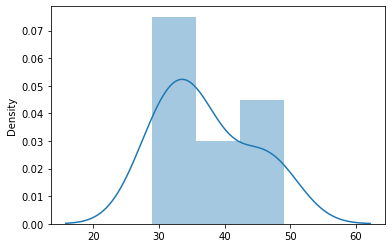

In [20]:
sns.distplot(sub1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

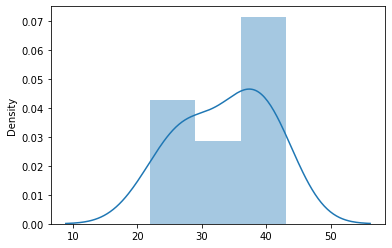

In [21]:
sns.distplot(sub2)

In [22]:
t_stat, p_val= stats.ttest_ind(sub1,sub2)
t_stat ,p_val

(1.1582810137580166, 0.26188706972319437)

In [23]:
#perform two sample t-test with equal variances
stats.ttest_ind(sub1, sub2, equal_var=True)

Ttest_indResult(statistic=1.1582810137580166, pvalue=0.26188706972319437)

The t test statistics is 1.3659 and the corresponding two_sided p-value is 0.1887. Because the p-value of our test(0.1887) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test.

We do not have sufficient evidence to say that the mean marks of sub1 and sub2 between the two is different.